# Notebook to visualize inpaint mask sizes


=== Subtype: amyloid_plaque_patches ===
Block successfully sampled at position: (68, 19, 59) with size: (24, 24, 12).
Block successfully sampled at position: (49, 34, 48) with size: (24, 24, 12).


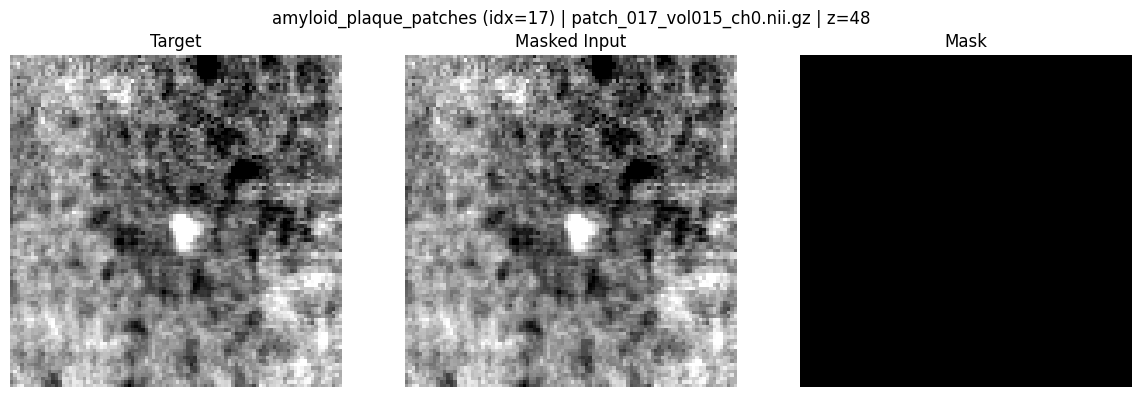

Block successfully sampled at position: (26, 64, 59) with size: (24, 24, 12).
Block successfully sampled at position: (37, 10, 36) with size: (24, 24, 12).


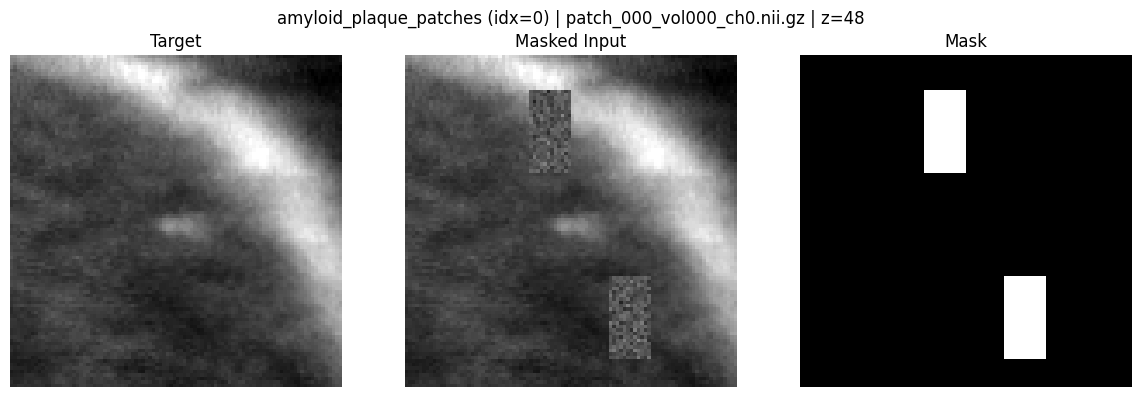

Block successfully sampled at position: (6, 44, 7) with size: (24, 24, 12).
Block successfully sampled at position: (7, 42, 12) with size: (24, 24, 12).


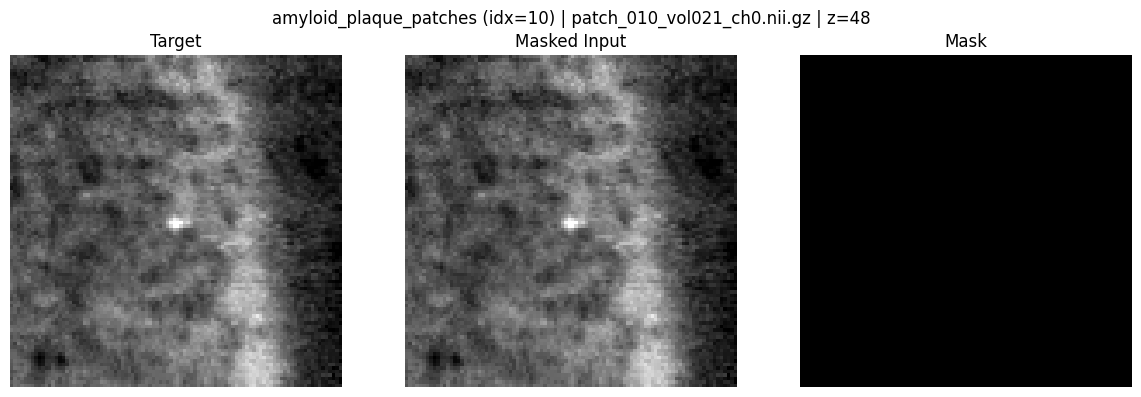


=== Subtype: c_fos_positive_patches ===
Block successfully sampled at position: (68, 19, 59) with size: (12, 12, 12).
Block successfully sampled at position: (49, 75, 34) with size: (12, 12, 12).
Block successfully sampled at position: (48, 27, 80) with size: (12, 12, 12).
Block successfully sampled at position: (38, 82, 70) with size: (12, 12, 12).


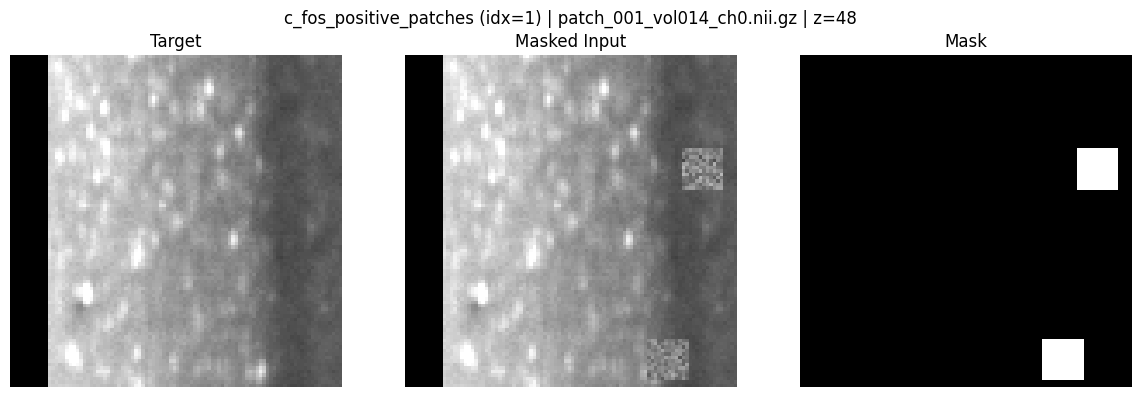

Block successfully sampled at position: (25, 13, 36) with size: (12, 12, 12).
Block successfully sampled at position: (9, 43, 56) with size: (12, 12, 12).
Retrying block sampling with smaller size: (10, 10, 10)
Block successfully sampled at position: (19, 32, 41) with size: (10, 10, 10).
Block successfully sampled at position: (38, 15, 29) with size: (12, 12, 12).


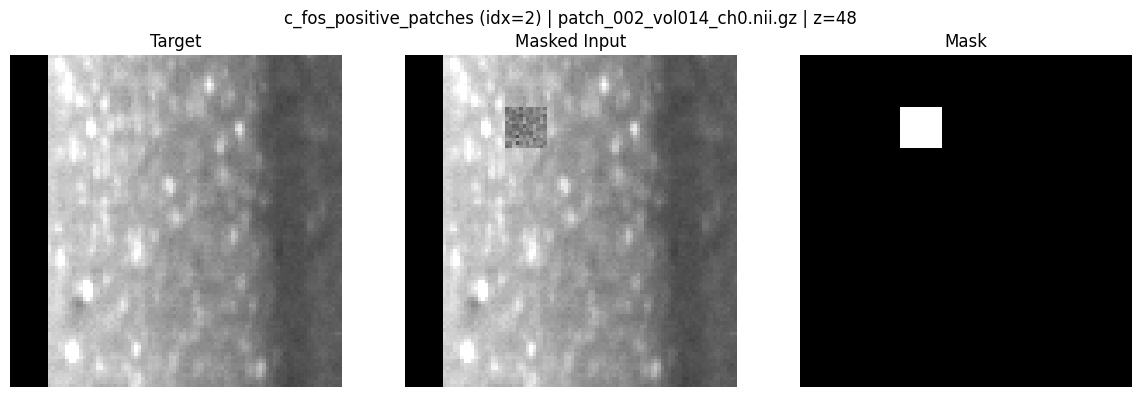

Block successfully sampled at position: (46, 63, 8) with size: (12, 12, 12).
Block successfully sampled at position: (68, 27, 18) with size: (12, 12, 12).
Block successfully sampled at position: (56, 71, 23) with size: (12, 12, 12).
Block successfully sampled at position: (42, 49, 44) with size: (12, 12, 12).


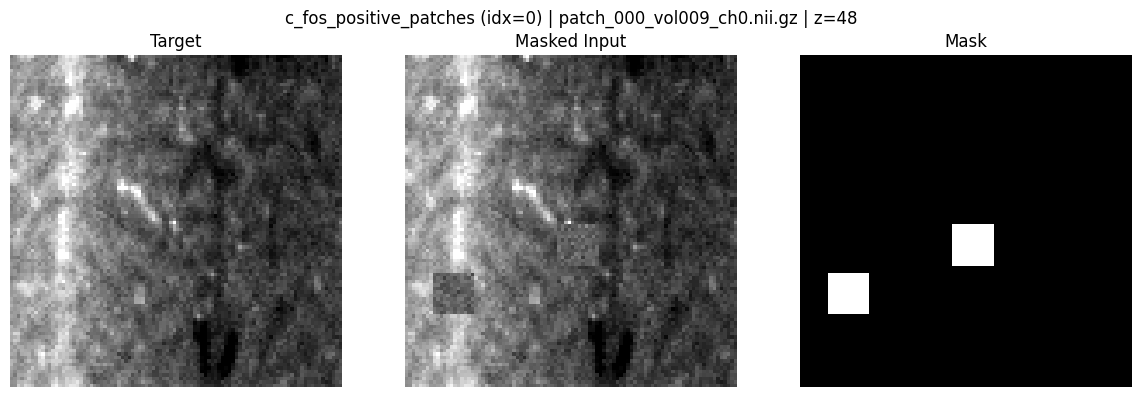


=== Subtype: cell_nucleus_patches ===
Block successfully sampled at position: (68, 19, 59) with size: (18, 18, 18).
Block successfully sampled at position: (49, 75, 34) with size: (18, 18, 18).
Block successfully sampled at position: (48, 27, 38) with size: (18, 18, 18).
Block successfully sampled at position: (70, 51, 57) with size: (18, 18, 18).
Block successfully sampled at position: (69, 4, 41) with size: (18, 18, 18).


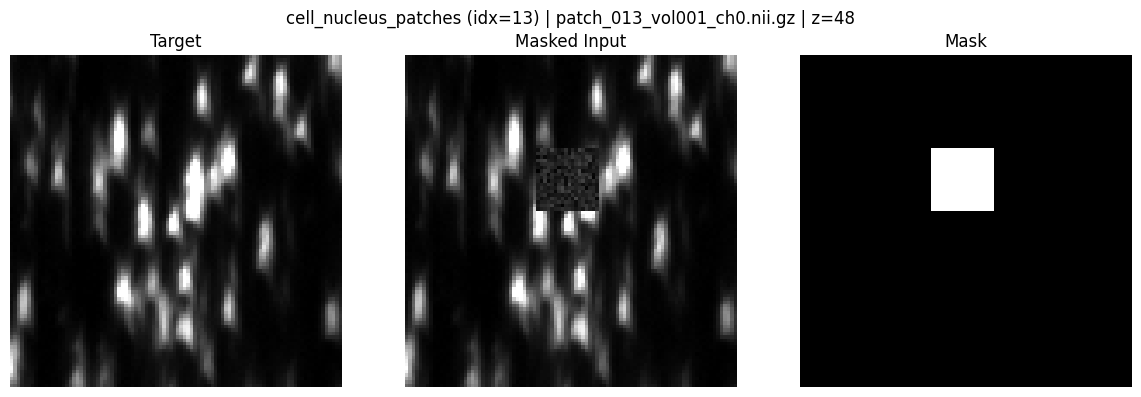

Block successfully sampled at position: (66, 60, 58) with size: (18, 18, 18).
Block successfully sampled at position: (50, 40, 13) with size: (18, 18, 18).
Block successfully sampled at position: (9, 28, 8) with size: (18, 18, 18).
Block successfully sampled at position: (72, 46, 43) with size: (18, 18, 18).
Block successfully sampled at position: (67, 28, 9) with size: (18, 18, 18).


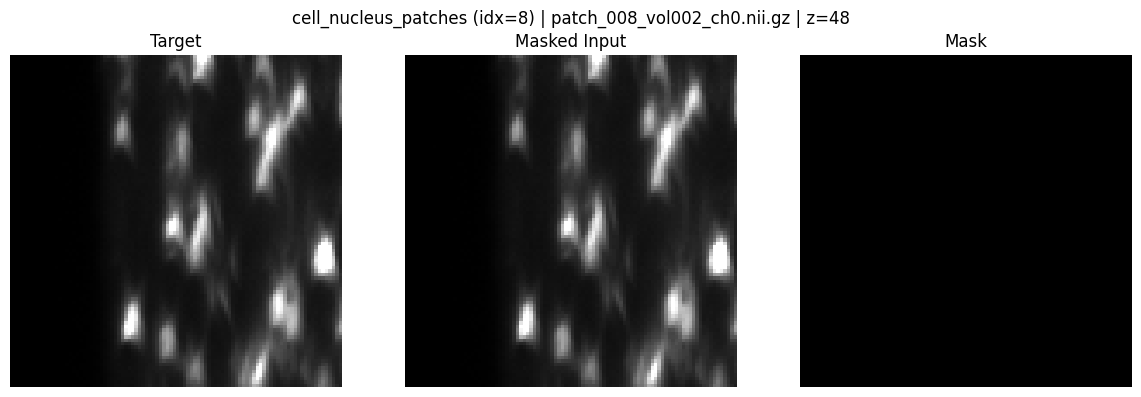

Block successfully sampled at position: (68, 46, 18) with size: (18, 18, 18).
Block successfully sampled at position: (33, 53, 70) with size: (18, 18, 18).
Block successfully sampled at position: (28, 16, 28) with size: (18, 18, 18).
Block successfully sampled at position: (36, 7, 26) with size: (18, 18, 18).
Block successfully sampled at position: (46, 34, 60) with size: (18, 18, 18).


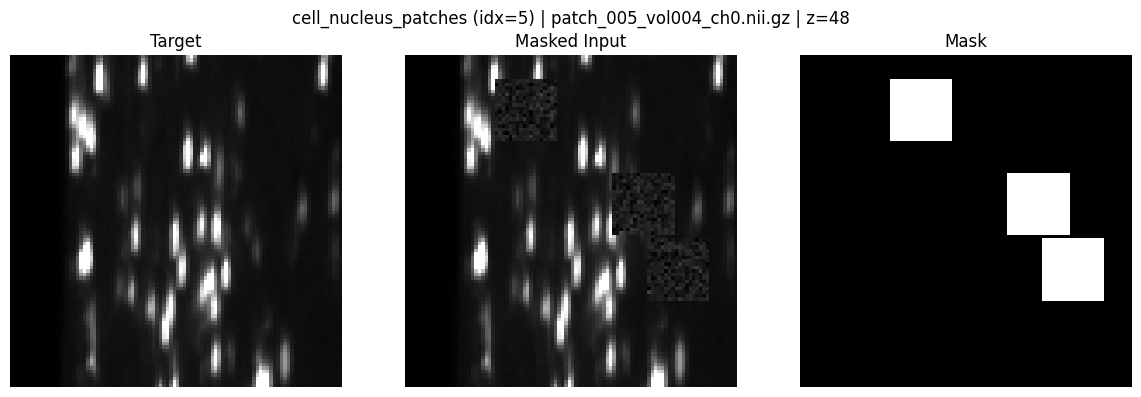


=== Subtype: vessels_patches ===
Block successfully sampled at position: (68, 19, 21) with size: (12, 12, 48).
Retrying block sampling with smaller size: (10, 10, 43)
Block successfully sampled at position: (34, 48, 34) with size: (10, 10, 43).


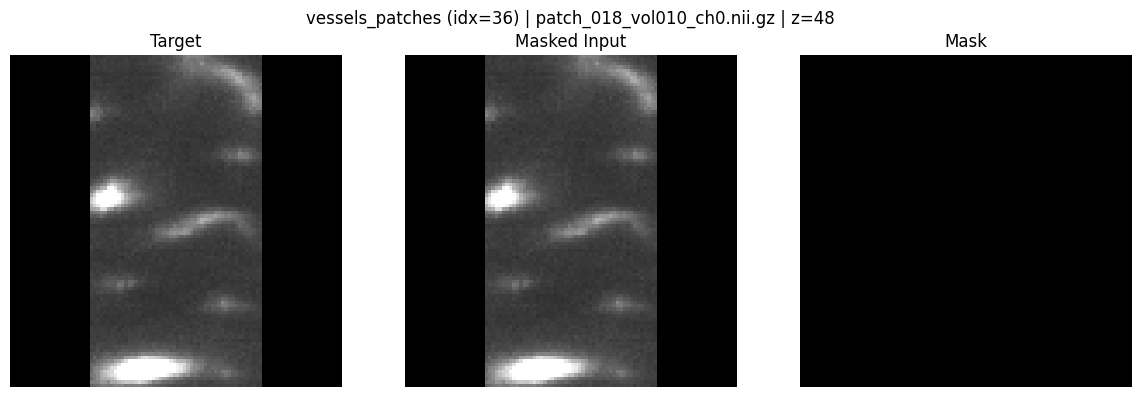

Retrying block sampling with smaller size: (10, 10, 43)
Retrying block sampling with smaller size: (9, 9, 38)
Retrying block sampling with smaller size: (8, 8, 34)
Retrying block sampling with smaller size: (7, 7, 30)
Retrying block sampling with smaller size: (6, 6, 27)
Retrying block sampling with smaller size: (5, 5, 24)
Block successfully sampled at position: (75, 7, 34) with size: (5, 5, 24).
Retrying block sampling with smaller size: (10, 10, 43)
Retrying block sampling with smaller size: (9, 9, 38)
Retrying block sampling with smaller size: (8, 8, 34)
Retrying block sampling with smaller size: (7, 7, 30)
Block successfully sampled at position: (61, 18, 22) with size: (7, 7, 30).


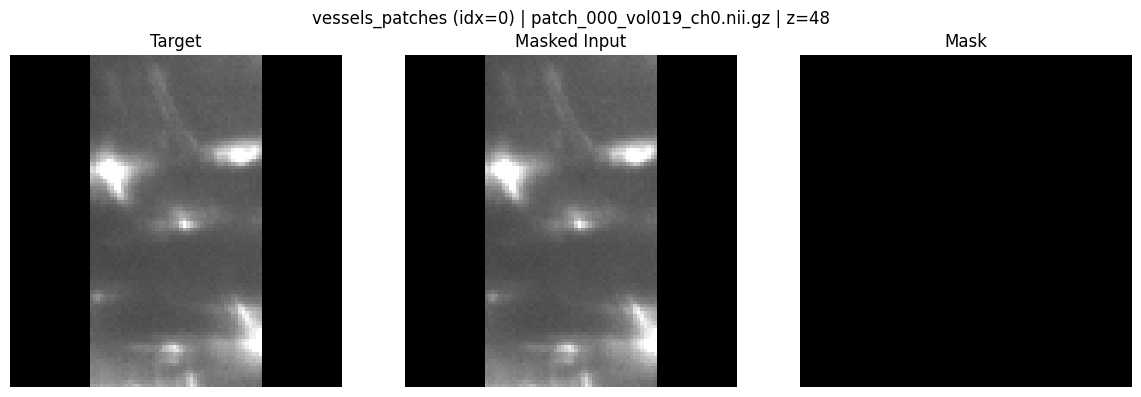

Retrying block sampling with smaller size: (10, 10, 43)
Block successfully sampled at position: (30, 18, 30) with size: (10, 10, 43).
Block successfully sampled at position: (43, 42, 20) with size: (12, 12, 48).


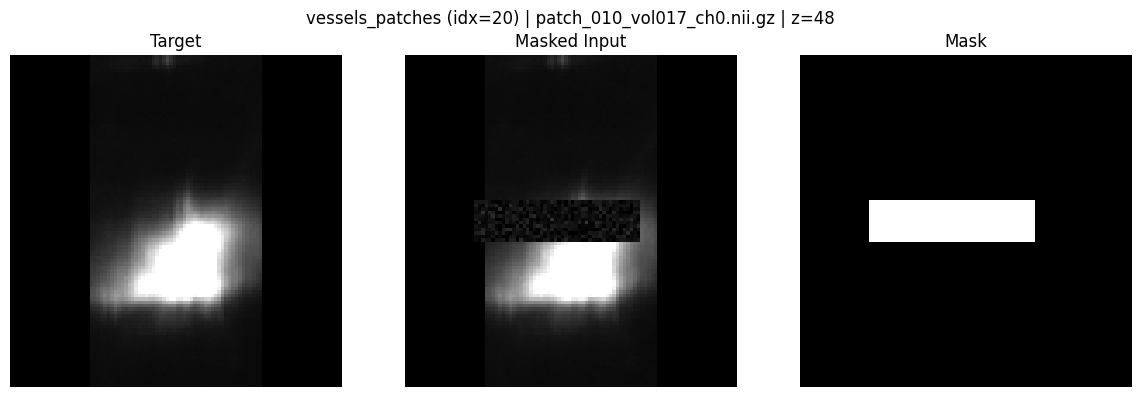

In [1]:
# --- Setup ---

import os
from pathlib import Path
import random
import numpy as np
import matplotlib.pyplot as plt
import torch

import sys
sys.path.append('/home/ads4015/ssl_project/data')
from nifti_inpaint_dataset import NiftiInpaintDataset, discover_nifti_inpaint_items

# Path to finetuning patch folders
DATA_ROOT = Path("/midtier/paetzollab/scratch/ads4015/data_selma3d/selma3d_finetune_patches")

# Per-subtype visualization config using YOUR real argument names
# IMPORTANT: mask_fixed_size values are SCALARS here, because the dataset
# currently does `self.mask_fixed_size = int(mask_fixed_size)`.
MASK_CONFIG = {
    "amyloid_plaque_patches": {
        "mask_mode": "fixed_size",
        "mask_ratio": 0.3,
        "mask_ratio_test": 0.3,
        "mask_fixed_size": (24,24,12),
        "mask_fixed_size_test": (24,24,12),
        "num_mask_blocks": 2,
        "num_mask_blocks_test": 2,
    },
    "c_fos_positive_patches": {
        "mask_mode": "fixed_size",
        "mask_ratio": 0.3,
        "mask_ratio_test": 0.3,
        "mask_fixed_size": "12",
        "mask_fixed_size_test": "12",
        "num_mask_blocks": 4,
        "num_mask_blocks_test": 4,
    },
    "cell_nucleus_patches": {
        "mask_mode": "fixed_size",
        "mask_ratio": 0.25,
        "mask_ratio_test": 0.25,
        "mask_fixed_size": "18",
        "mask_fixed_size_test": "18",
        "num_mask_blocks": 5,
        "num_mask_blocks_test": 5,
    },
    "vessels_patches": {
        "mask_mode": "fixed_size",
        "mask_ratio": 0.2,
        "mask_ratio_test": 0.2,
        "mask_fixed_size": (12,12,48),
        "mask_fixed_size_test": (12,12,48),
        "num_mask_blocks": 2,
        "num_mask_blocks_test": 2,
    },
}

# --- Helper: parse mask_fixed_size (scalar OR tuple) ---
def parse_mask_fixed_size(val):
    """
    Accepts:
      - int
      - tuple/list, e.g. (24, 24, 12)
      - '32'
      - '24,24,12'
    Returns:
      - int or (d,h,w) tuple of ints
    """
    # already numeric/tuple → return as-is (normalize tuple/list to tuple of ints)
    if isinstance(val, (tuple, list)):
        return tuple(int(x) for x in val)
    if isinstance(val, int):
        return val

    s = str(val).strip()

    # tuple-like string: "24,24,12"
    if "," in s:
        parts = [p.strip() for p in s.split(",") if p.strip()]
        if len(parts) != 3:
            raise ValueError(f"mask_fixed_size '{val}' must be 'd,h,w' if using commas.")
        return tuple(int(p) for p in parts)

    # simple scalar string: "18"
    return int(s)


# --- Build dataset (using mask_fixed_size + num_mask_blocks) ---

def build_inpaint_dataset_for_subtype(subtype, is_test=False, seed=100):
    cfg = MASK_CONFIG[subtype]
    class_dir = DATA_ROOT / subtype

    if not class_dir.is_dir():
        raise FileNotFoundError(f"Subtype directory not found: {class_dir}")

    items = discover_nifti_inpaint_items(class_dir, channel_substr="ALL")
    if not items:
        raise RuntimeError(f"No items found in {class_dir}")

    mask_mode = cfg["mask_mode"]
    mask_ratio = cfg["mask_ratio_test" if is_test else "mask_ratio"]

    mask_fixed_size_raw = cfg["mask_fixed_size_test" if is_test else "mask_fixed_size"]
    mask_fixed_size = parse_mask_fixed_size(mask_fixed_size_raw)

    num_mask_blocks = cfg["num_mask_blocks_test" if is_test else "num_mask_blocks"]

    ds = NiftiInpaintDataset(
        items,
        captions_json=None,
        default_caption_by_subtype={},
        mask_mode=mask_mode,
        mask_ratio=mask_ratio,
        mask_fixed_size=mask_fixed_size,   # scalar
        augment=False,                     # no jitter so you see base size
        seed=seed,
        num_mask_blocks=num_mask_blocks,
    )
    return ds


# --- Visualization helper ---

def show_mid_slices(sample, title_prefix=""):
    masked_vol = sample["masked_vol"].numpy()   # (1,D,H,W)
    mask       = sample["mask"].numpy()         # (1,D,H,W)
    target_vol = sample["target_vol"].numpy()   # (1,D,H,W)
    fname      = sample["filename"]

    _, D, H, W = target_vol.shape
    z = D // 2

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"{title_prefix} | {fname} | z={z}")

    axes[0].imshow(target_vol[0, z], cmap='gray')
    axes[0].set_title("Target")
    axes[0].axis("off")

    axes[1].imshow(masked_vol[0, z], cmap='gray')
    axes[1].set_title("Masked Input")
    axes[1].axis("off")

    axes[2].imshow(mask[0, z], cmap='gray')
    axes[2].set_title("Mask")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()


# --- Visualize examples for each subtype ---

def visualize_subtype(subtype, n_samples=3):
    print(f"\n=== Subtype: {subtype} ===")
    ds = build_inpaint_dataset_for_subtype(subtype, is_test=False, seed=123)
    idxs = random.sample(range(len(ds)), min(n_samples, len(ds)))
    for idx in idxs:
        sample = ds[idx]
        show_mid_slices(sample, title_prefix=f"{subtype} (idx={idx})")


# Run visualization for all four SELMA subtypes
for subtype in [
    "amyloid_plaque_patches",
    "c_fos_positive_patches",
    "cell_nucleus_patches",
    "vessels_patches",
]:
    visualize_subtype(subtype)
